In [2]:
!pip install numpy pandas


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import sys
print(sys.executable)


C:\Users\PC\Desktop\Projects\AI\Call_Center_AI\extraction_data\notebook\Scripts\python.exe


In [1]:
import numpy as np
import pandas as pd

In [2]:
math_data = pd.read_csv(r'C:\Users\PC\Desktop\ESISA\4 eme - Semestre 2\Data Analyst\projet\student+performance\student\student-mat.csv', sep=';')
portuguese_data = pd.read_csv(r'C:\Users\PC\Desktop\ESISA\4 eme - Semestre 2\Data Analyst\projet\student+performance\student\student-por.csv', sep=';')


In [4]:
math_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
portuguese_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

# Prétraitement 

In [7]:
print(f"Dimensions du dataset math: {math_data.shape}")
print(f"Dimensions du dataset portugais: {portuguese_data.shape}")


Dimensions du dataset math: (395, 33)
Dimensions du dataset portugais: (649, 33)


###  Fusion des datasets

In [29]:
df= pd.merge(math_data, portuguese_data, 
              on=["school", "sex", "age", "address", "famsize", "Pstatus", 
                  "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"])



In [30]:
print(f"Nombre d'étudiants communs: {len(df)}") 


Nombre d'étudiants communs: 382


In [31]:
df.shape

(382, 53)

In [32]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian_x', 'traveltime_x', 'studytime_x',
       'failures_x', 'schoolsup_x', 'famsup_x', 'paid_x', 'activities_x',
       'nursery', 'higher_x', 'internet', 'romantic_x', 'famrel_x',
       'freetime_x', 'goout_x', 'Dalc_x', 'Walc_x', 'health_x', 'absences_x',
       'G1_x', 'G2_x', 'G3_x', 'guardian_y', 'traveltime_y', 'studytime_y',
       'failures_y', 'schoolsup_y', 'famsup_y', 'paid_y', 'activities_y',
       'higher_y', 'romantic_y', 'famrel_y', 'freetime_y', 'goout_y', 'Dalc_y',
       'Walc_y', 'health_y', 'absences_y', 'G1_y', 'G2_y', 'G3_y'],
      dtype='object')

In [33]:
# Obtenir les colonnes avec suffixes _x et _y
x_cols = [col for col in df.columns if col.endswith('_x')]
y_cols = [col for col in df.columns if col.endswith('_y')]

common_cols = [col[:-2] for col in x_cols if col[:-2] + '_y' in df.columns]

print("Colonnes dupliquées (paire _x/_y) détectées :")
for col in common_cols:
    print(f"- {col}_x & {col}_y")


Colonnes dupliquées (paire _x/_y) détectées :
- guardian_x & guardian_y
- traveltime_x & traveltime_y
- studytime_x & studytime_y
- failures_x & failures_y
- schoolsup_x & schoolsup_y
- famsup_x & famsup_y
- paid_x & paid_y
- activities_x & activities_y
- higher_x & higher_y
- romantic_x & romantic_y
- famrel_x & famrel_y
- freetime_x & freetime_y
- goout_x & goout_y
- Dalc_x & Dalc_y
- Walc_x & Walc_y
- health_x & health_y
- absences_x & absences_y
- G1_x & G1_y
- G2_x & G2_y
- G3_x & G3_y


### Stratégies pour résoudre le problème des colonnes dupliquées

***
Colonnes très similaires (> 90%)
Conserver une seule version (ex. guardian_x) et supprimer l'autre (guardian_y).
Colonnes concernées : guardian, traveltime, studytime, schoolsup, famsup, activities, higher, romantic, famrel, freetime, goout, Dalc, Walc, health.

Colonnes moyennement cohérentes (60% < cohérence < 90%)
Garder les deux si nécessaire, sinon ne conserver qu'une seule.

Exemple : failures (86%) → garder failures_x.

paid (55%) → utile de conserver les deux pour comparer les cours.

Colonnes très divergentes (< 50%)
Garder les deux ou analyser individuellement.

Exemple : absences (26,7%) → conserver séparément (absences_math, absences_por).

Colonnes de notes (G1, G2, G3)
Garder les deux versions et les renommer par matière (ex. G1_math, G1_por).
***

In [34]:
# 6. Identifier les colonnes dupliquées avec suffixes _math et _por
math_cols = [col for col in df.columns if col.endswith('_x')]
por_cols = [col for col in df.columns if col.endswith('_y')]
common_prefix = [col[:-2] for col in math_cols if col[:-2] + '_y' in df.columns]
common_prefix

['guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'higher',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [35]:
print("\nVérification de la cohérence des colonnes dupliquées...")
consistency_check = {}

for col in common_prefix:
    # Exclure les notes qui sont naturellement différentes
    if col not in ['G1', 'G2', 'G3']:  
        math_col = f"{col}_x"
        por_col = f"{col}_y"
        # Calculer le pourcentage de valeurs identiques
        identical = (df[math_col] == df[por_col]).mean() * 100
        consistency_check[col] = identical
        print(f"- {col}: {identical:.2f}% des valeurs sont identiques entre math et portugais")



Vérification de la cohérence des colonnes dupliquées...
- guardian: 98.43% des valeurs sont identiques entre math et portugais
- traveltime: 98.69% des valeurs sont identiques entre math et portugais
- studytime: 97.64% des valeurs sont identiques entre math et portugais
- failures: 86.13% des valeurs sont identiques entre math et portugais
- schoolsup: 99.21% des valeurs sont identiques entre math et portugais
- famsup: 98.69% des valeurs sont identiques entre math et portugais
- paid: 55.24% des valeurs sont identiques entre math et portugais
- activities: 98.69% des valeurs sont identiques entre math et portugais
- higher: 98.95% des valeurs sont identiques entre math et portugais
- romantic: 98.43% des valeurs sont identiques entre math et portugais
- famrel: 97.38% des valeurs sont identiques entre math et portugais
- freetime: 97.12% des valeurs sont identiques entre math et portugais
- goout: 97.38% des valeurs sont identiques entre math et portugais
- Dalc: 98.69% des valeurs 

In [36]:
cols_to_drop = [
    'guardian_y', 'traveltime_y', 'studytime_y', 'schoolsup_y', 'famsup_y',
    'activities_y', 'higher_y', 'romantic_y', 'famrel_y', 'freetime_y',
    'goout_y', 'Dalc_y', 'Walc_y', 'health_y'
]
df.drop(columns=cols_to_drop, inplace=True)


In [37]:
df.rename(columns={col: col[:-2] for col in df.columns if col.endswith('_x')}, inplace=True)

In [38]:
df.rename(columns={
    'paid_x': 'paid_math', 'paid_y': 'paid_por',
    'failures_x': 'failures_math', 'failures_y': 'failures_por',
    'absences_x': 'absences_math', 'absences_y': 'absences_por',
    'G1_x': 'G1_math', 'G2_x': 'G2_math', 'G3_x': 'G3_math',
    'G1_y': 'G1_por', 'G2_y': 'G2_por', 'G3_y': 'G3_por',
}, inplace=True)


In [40]:
print(df.columns.tolist())

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'failures_por', 'paid_por', 'absences_por', 'G1_por', 'G2_por', 'G3_por']


### Vérifier les valeurs manquantes

In [42]:
df.isnull().sum().sort_values(ascending=False)


school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences        0
G1              0
G2              0
G3              0
failures_por    0
paid_por        0
absences_por    0
G1_por          0
G2_por          0
G3_por          0
dtype: int64

### Nettoyage des types de données

In [44]:
df.dtypes


school          object
sex             object
age              int64
address         object
famsize         object
Pstatus         object
Medu             int64
Fedu             int64
Mjob            object
Fjob            object
reason          object
guardian        object
traveltime       int64
studytime        int64
failures         int64
schoolsup       object
famsup          object
paid            object
activities      object
nursery         object
higher          object
internet        object
romantic        object
famrel           int64
freetime         int64
goout            int64
Dalc             int64
Walc             int64
health           int64
absences         int64
G1               int64
G2               int64
G3               int64
failures_por     int64
paid_por        object
absences_por     int64
G1_por           int64
G2_por           int64
G3_por           int64
dtype: object

In [45]:
# Identifier toutes les colonnes catégorielles
cat_cols = df.select_dtypes(include='object').columns

# Standardiser toutes les valeurs : minuscules + suppression des espaces
for col in cat_cols:
    df[col] = df[col].str.lower().str.strip()

# Vérification du résultat
print(df[cat_cols].head())


  school sex address famsize Pstatus     Mjob      Fjob  reason guardian  \
0     gp   f       u     gt3       a  at_home   teacher  course   mother   
1     gp   f       u     gt3       t  at_home     other  course   father   
2     gp   f       u     le3       t  at_home     other   other   mother   
3     gp   f       u     gt3       t   health  services    home   mother   
4     gp   f       u     gt3       t    other     other    home   father   

  schoolsup famsup paid activities nursery higher internet romantic paid_por  
0       yes     no   no         no     yes    yes       no       no       no  
1        no    yes   no         no      no    yes      yes       no       no  
2       yes     no  yes         no     yes    yes      yes       no       no  
3        no    yes  yes        yes     yes    yes      yes      yes       no  
4        no    yes  yes         no     yes    yes       no       no       no  


In [46]:
!pip install python-Levenshtein

In [1]:
valid_values = {
    'school': ['gp', 'ms'],
    'sex': ['f', 'm'],
    'address': ['u', 'r'],
    'famsize': ['le3', 'gt3'],
    'Pstatus': ['t', 'a'],
    'Mjob': ['teacher', 'health', 'services', 'at_home', 'other'],
    'Fjob': ['teacher', 'health', 'services', 'at_home', 'other'],
    'reason': ['home', 'reputation', 'course', 'other'],
    'guardian': ['mother', 'father', 'other'],
    'schoolsup': ['yes', 'no'],
    'famsup': ['yes', 'no'],
    'paid': ['yes', 'no'],
    'activities': ['yes', 'no'],
    'nursery': ['yes', 'no'],
    'higher': ['yes', 'no'],
    'internet': ['yes', 'no'],
    'romantic': ['yes', 'no']
}


In [2]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Colonnes catégorielles
cat_cols = df.select_dtypes(include='object').columns

# Seuil de similarité
SIMILARITY_THRESHOLD = 90

for col in cat_cols:
    print(f"\nTraitement de la colonne: {col}")
    unique_vals = df[col].dropna().str.lower().str.strip().unique()
    replacements = {}

    # Définir les valeurs de référence (soit connues, soit les premières observées)
    if col in valid_values:
        reference_vals = valid_values[col]
    else:
        reference_vals = list(unique_vals)

    # Pour chaque valeur observée, trouver la meilleure correspondance valide
    for val in unique_vals:
        match, score = process.extractOne(val, reference_vals, scorer=fuzz.ratio)
        if score >= SIMILARITY_THRESHOLD:
            replacements[val] = match
        else:
            replacements[val] = val  # on garde la valeur telle quelle

    # Nettoyage de la colonne
    df[col] = df[col].str.lower().str.strip().map(replacements)
    print("Valeurs corrigées :", replacements)

# Vérification finale
for col in cat_cols:
    print(f"\n{col}: {df[col].unique()}")


# for col in cat_cols:
#     print(f"\nTraitement de la colonne: {col}")
#     unique_vals = df[col].dropna().unique()
#     replacements = {}

#     for val in unique_vals:
#         val_clean = val.lower().strip()
        
#         # Cas initial : aucun élément encore dans replacements
#         if not replacements:
#             replacements[val_clean] = val_clean
#             continue

#         # Sinon, chercher une correspondance
#         result = process.extractOne(val_clean, list(replacements.keys()), scorer=fuzz.ratio)
        
#         if result is not None:
#             best_match, score = result
#             if score >= SIMILARITY_THRESHOLD:
#                 replacements[val_clean] = replacements[best_match]  # Fusion
#             else:
#                 replacements[val_clean] = val_clean  # Nouvelle entrée
#         else:
#             replacements[val_clean] = val_clean

#     # Appliquer la correction
#     df[col] = df[col].str.lower().str.strip().map(replacements)

#     # Affichage des correspondances trouvées
#     print("Valeurs corrigées :", replacements)

# # Vérification finale
# for col in cat_cols:
#     print(f"\n{col}: {df[col].unique()}")


ModuleNotFoundError: No module named 'fuzzywuzzy'

## Détection des outliers

In [48]:
!pip install seaborn 

In [49]:
# Sélection des colonnes numériques
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Détection des valeurs aberrantes avec la méthode IQR
outliers_iqr = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    outliers_iqr[col] = len(outliers)

# Afficher les colonnes avec le plus grand nombre de valeurs aberrantes
sorted(outliers_iqr.items(), key=lambda x: x[1], reverse=True)


[('failures', 66),
 ('failures_por', 34),
 ('studytime', 27),
 ('famrel', 27),
 ('freetime', 18),
 ('Dalc', 17),
 ('absences_por', 17),
 ('age', 13),
 ('absences', 13),
 ('G2', 13),
 ('G3_por', 12),
 ('traveltime', 8),
 ('G2_por', 2),
 ('G1_por', 1),
 ('Medu', 0),
 ('Fedu', 0),
 ('goout', 0),
 ('Walc', 0),
 ('health', 0),
 ('G1', 0),
 ('G3', 0)]

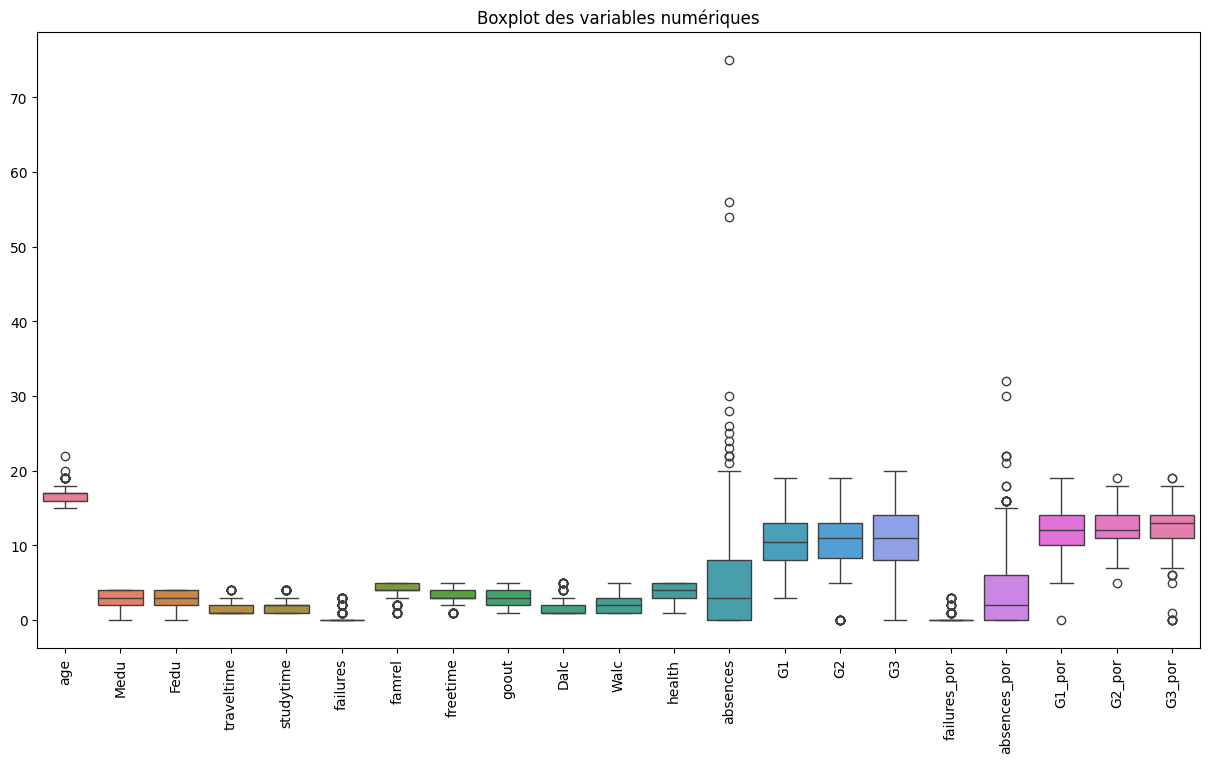

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=90)
plt.title("Boxplot des variables numériques")
plt.show()


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian_x', 'traveltime_x', 'studytime_x',
       'failures_x', 'schoolsup_x', 'famsup_x', 'paid_x', 'activities_x',
       'nursery', 'higher_x', 'internet', 'romantic_x', 'famrel_x',
       'freetime_x', 'goout_x', 'Dalc_x', 'Walc_x', 'health_x', 'absences_x',
       'G1_x', 'G2_x', 'G3_x', 'guardian_y', 'traveltime_y', 'studytime_y',
       'failures_y', 'schoolsup_y', 'famsup_y', 'paid_y', 'activities_y',
       'higher_y', 'romantic_y', 'famrel_y', 'freetime_y', 'goout_y', 'Dalc_y',
       'Walc_y', 'health_y', 'absences_y', 'G1_y', 'G2_y', 'G3_y'],
      dtype='object')

 ### Standardisation des valeurs catégorielles
